In [64]:
# Numerical/scientific computing packages.
import numpy as np
import scipy

# Machine learning package.
import sklearn
from sklearn import datasets
from sklearn import metrics, model_selection, tree
import pandas as pd

from sklearn import cluster
from scipy.cluster import vq
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.spatial.distance import squareform 

# For computing gradients.
import autograd.numpy as np
from autograd import grad, elementwise_grad

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt

import time
import math

In [65]:
# initializing seed
import random
random.seed(11993511)

In [110]:
# Load data:
file = pd.read_csv('musicData.csv')
df = pd.DataFrame(file)
df['mode'] = df['mode'].apply({'Major':1, 'Minor':0}.get)
df['key'] = df['key'].apply({'A':1, 'A#':2, 'B':3, 'C':4, 'C#':5, 'D':6, 'D#':7, 'E':8, 'F':9, 'F#':10, 'G':11, 'G#':12}.get)
# df['music_genre'] = df['music_genre'].apply({'Electronic':0, 'Anime':1, 'Jazz':2, 'Alternative':3, 'Country':4, 'Rap':5, 'Blues':6, 'Rock':7, 'Classical':8, 'Hip-Hop':9}.get)
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,2.0,0.115,-5.201,0.0,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,6.0,0.124,-7.043,0.0,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,12.0,0.534,-4.617,1.0,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,5.0,0.157,-4.498,1.0,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,10.0,0.157,-6.266,1.0,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,5.0,0.119,-7.022,1.0,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,3.0,0.109,-9.814,1.0,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,6.0,0.143,-5.443,1.0,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,11.0,0.106,-5.016,0.0,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [111]:
df = df.dropna(axis=0)
y = pd.get_dummies(df.music_genre, prefix='music_genre')
numeric_cols = df.select_dtypes(exclude='number')
df.drop(numeric_cols, axis=1, inplace=True)
# for i in df:
#     df[i] =pd.to_numeric(df[i], errors ='coerce').fillna('NaN').astype('float')
df

C:\Users\zhuho\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence
0,32894.0,27.0,0.00468,0.652,-1.0,0.941,0.79200,2.0,0.115,-5.201,0.0,0.0748,0.759
1,46652.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,6.0,0.124,-7.043,0.0,0.0300,0.531
2,30097.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,12.0,0.534,-4.617,1.0,0.0345,0.333
3,62177.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,5.0,0.157,-4.498,1.0,0.2390,0.270
4,24907.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,10.0,0.157,-6.266,1.0,0.0413,0.323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,59.0,0.03340,0.913,-1.0,0.574,0.00000,5.0,0.119,-7.022,1.0,0.2980,0.330
50001,43557.0,72.0,0.15700,0.709,251860.0,0.362,0.00000,3.0,0.109,-9.814,1.0,0.0550,0.113
50002,39767.0,51.0,0.00597,0.693,189483.0,0.763,0.00000,6.0,0.143,-5.443,1.0,0.1460,0.395
50003,57944.0,65.0,0.08310,0.782,262773.0,0.472,0.00000,11.0,0.106,-5.016,0.0,0.0441,0.354


In [112]:
from sklearn.preprocessing import StandardScaler
X = np.array(df.drop(['instance_id'], axis = 1))
Y = np.array(y)

print(X.shape, Y.shape)

(50000, 12) (50000, 10)


## After Pre Clustering...
### begin classification

In [122]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
 
# dividing X, y into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X[:5000], Y[:5000], test_size = 0.1, random_state = 42)
for i in range(1,10):
    x_train, x_test, y_train, y_test = train_test_split(X[5000*i:5000*(i+1)], Y[5000*i:5000*(i+1)], test_size = 0.1, random_state = 42)
    X_train = np.concatenate((X_train, x_train))
    X_test = np.concatenate((X_test, x_test))
    Y_train = np.concatenate((Y_train, y_train))
    Y_test = np.concatenate((Y_test, y_test))

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(45000, 12) (5000, 12) (45000, 10) (5000, 10)


### Neural Network

In [123]:
import torch
from torch import nn, optim
import math
from IPython import display

In [124]:
seed = 11993511
random.seed(seed)
torch.manual_seed(seed)

D = 12  # dimensions
C = 10  # num_classes
H = 20  # num_hidden_units

In [125]:
X_train = torch.from_numpy(X_train)
Y_train = torch.from_numpy(Y_train)
X_test = torch.from_numpy(X_test)
Y_test = torch.from_numpy(Y_test)

In [126]:
learning_rate = 1e-3
lambda_l2 = 1e-5

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C),
    nn.Sigmoid(),
)

In [127]:
criterion = torch.nn.MultiLabelMarginLoss()
# Training
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

for t in range(1000):
    
    # Forward pass over the model to get the logits
    Y_pred = model(X_train.float())
    
    # Compute the loss and accuracy
    loss = criterion(Y_pred, Y_train.long())
    print("[EPOCH]: %i, [LOSS]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward()
    
    # Update params
    optimizer.step()
    
with torch.no_grad():
    Y_score = np.array(model(X_test.float()))

[EPOCH]: 999, [LOSS]: 0.000037


In [128]:
print(Y_score)

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]


In [120]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

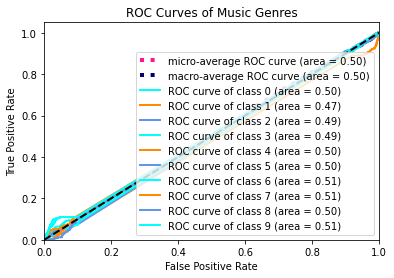

In [121]:
n_classes = C

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of Music Genres")
plt.legend(loc="lower right")
plt.show()

In [106]:
# classification using random forest
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np

forest = RandomForestClassifier(random_state=0)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
Y_score = multi_target_forest.fit(X_train, Y_train).predict(X_test)

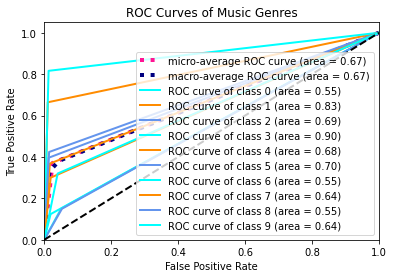

In [107]:
n_classes = 10

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of Music Genres")
plt.legend(loc="lower right")
plt.show()

### Additionally, if we build a model based on the results of dimensionality reducion

In [97]:
# apply dimensionality reduction
tsne = TSNE(n_components=3, perplexity=30)
X_embedded = tsne.fit_transform(X)

In [98]:
X = X_embedded
X_train, X_test, Y_train, Y_test = train_test_split(X[:5000], Y[:5000], test_size = 0.1, random_state = 42)
for i in range(1,10):
    x_train, x_test, y_train, y_test = train_test_split(X[5000*i:5000*(i+1)], Y[5000*i:5000*(i+1)], test_size = 0.1, random_state = 42)
    X_train = np.concatenate((X_train, x_train))
    X_test = np.concatenate((X_test, x_test))
    Y_train = np.concatenate((Y_train, y_train))
    Y_test = np.concatenate((Y_test, y_test))

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

forest = RandomForestClassifier(random_state=0)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
Y_score = multi_target_forest.fit(X_train, Y_train).predict(X_test)

(45000, 3) (5000, 3) (45000, 10) (5000, 10)


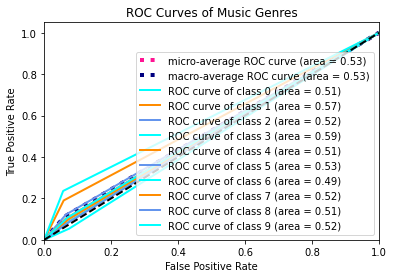

In [99]:
n_classes = 10

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of Music Genres")
plt.legend(loc="lower right")
plt.show()

In [129]:
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_labels = clusterer.fit_predict(X_embedded)

In [138]:
print(cluster_labels.reshape(-1,1).shape)

(50000, 1)


In [140]:
# adding the cluster labels into X to predict Y
X = np.concatenate((X_embedded, np.array(cluster_labels.reshape(-1,1))), axis=1)

# dividing X, y into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X[:5000], Y[:5000], test_size = 0.1, random_state = 42)
for i in range(1,10):
    x_train, x_test, y_train, y_test = train_test_split(X[5000*i:5000*(i+1)], Y[5000*i:5000*(i+1)], test_size = 0.1, random_state = 42)
    X_train = np.concatenate((X_train, x_train))
    X_test = np.concatenate((X_test, x_test))
    Y_train = np.concatenate((Y_train, y_train))
    Y_test = np.concatenate((Y_test, y_test))

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(45000, 4) (5000, 4) (45000, 10) (5000, 10)


In [141]:
forest = RandomForestClassifier(random_state=0)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
Y_score = multi_target_forest.fit(X_train, Y_train).predict(X_test)

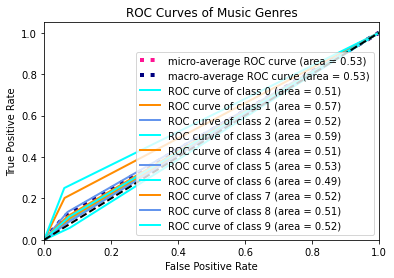

In [142]:
n_classes = 10

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of Music Genres")
plt.legend(loc="lower right")
plt.show()

In [149]:
# clustering using DBSCAN
## DBSCAN Algorithm
def region_query (p, eps, X):
    # These lines check that the inputs `p` and `X` have
    # the right shape.
    _, dim = X.shape
    assert (p.shape == (dim,)) or (p.shape == (1, dim)) or (p.shape == (dim, 1))
    
    return np.linalg.norm (p - X, axis=1) <= eps

def index_set (y):
    """
    Given a boolean vector, this function returns
    the indices of all True elements.
    """
    assert len (y.shape) == 1
    return set (np.where (y)[0])

def find_neighbors (eps, X):
    m, d = X.shape
    neighbors = [] # Empty list to start
    for i in range (len (X)):
        n_i = index_set (region_query (X[i, :], eps, X))
        neighbors.append (n_i)
    assert len (neighbors) == m
    return neighbors

def find_core_points (s, neighbors):
    assert type (neighbors) is list
    assert all ([type (n) is set for n in neighbors])
    
    core_set = set ()
    for i, n_i in enumerate (neighbors):
        if len (n_i) >= s:
            core_set.add (i)
    return core_set

def expand_cluster (p, neighbors, core_set, visited, assignment):
    # Assume the caller performs Steps 1 and 2 of the procedure.
    # That means 'p' must be a core point that is part of a cluster.
    assert (p in core_set) and (p in visited) and (p in assignment)
    
    reachable = set (neighbors[p])  # Step 3
    while reachable:
        q = reachable.pop () # Step 4
        
        if q not in visited:
            visited.add (q) # Mark q as visited
            if q in core_set:
                reachable |= neighbors[q]
        if q not in assignment:
            assignment[q] = assignment[p]
    
def dbscan (eps, s, X):
    clusters = []
    point_to_cluster = {}
    
    neighbors = find_neighbors (eps, X)
    core_set = find_core_points (s, neighbors)
    
    assignment = {}
    next_cluster_id = 0

    visited = set ()
    for i in core_set: # for each core point i
        if i not in visited:
            visited.add (i) # Mark i as visited
            assignment[i] = next_cluster_id
            expand_cluster (i, neighbors, core_set,
                            visited, assignment)
            next_cluster_id += 1

    return assignment, core_set

In [160]:
import seaborn as sns
## Visualization
def fn(fn_base, dirname='./misc/'): 
    return '{}{}'.format(dirname, fn_base)

crater = pd.DataFrame(X_embedded, columns = ['x_1', 'x_2', 'x_3']) # based on t-SNE dimension reduction

# make_scatter_plot (crater, hue='kmeans_label')
X_db = crater[['x_1', 'x_2', 'x_3']].values
assignment, core_set = dbscan(4, 70, X_db)

print ("Number of core points:", len(core_set))
print ("Number of clusters:", max(assignment.values())+1)
print ("Number of unclassified points:", len(X_db) - len(assignment))

labels = [-1] * len (X)
for i, c in assignment.items ():
    labels[i] = c

Number of core points: 47406
Number of clusters: 30
Number of unclassified points: 0


In [161]:
print(X_embedded.shape, np.array(labels).shape)
cluster_labels = np.array(labels)

(50000, 3) (50000,)


In [162]:
# adding the cluster labels into X to predict Y
X = np.concatenate((X_embedded, np.array(cluster_labels.reshape(-1,1))), axis=1)

# dividing X, y into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X[:5000], Y[:5000], test_size = 0.1, random_state = 42)
for i in range(1,10):
    x_train, x_test, y_train, y_test = train_test_split(X[5000*i:5000*(i+1)], Y[5000*i:5000*(i+1)], test_size = 0.1, random_state = 42)
    X_train = np.concatenate((X_train, x_train))
    X_test = np.concatenate((X_test, x_test))
    Y_train = np.concatenate((Y_train, y_train))
    Y_test = np.concatenate((Y_test, y_test))

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(45000, 4) (5000, 4) (45000, 10) (5000, 10)


In [163]:
forest = RandomForestClassifier(random_state=0)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
Y_score = multi_target_forest.fit(X_train, Y_train).predict(X_test)

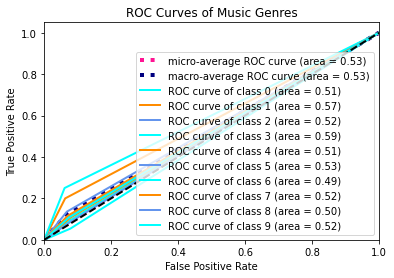

In [164]:
n_classes = 10

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of Music Genres")
plt.legend(loc="lower right")
plt.show()